In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [15]:
df = pd.read_csv('COCA COLA.csv')

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


In [17]:
df.info

<bound method DataFrame.info of              Date       Open       High        Low      Close  Adj Close  \
0      1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133   
1      1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   
2      1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374   
3      1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   
4      1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   
...           ...        ...        ...        ...        ...        ...   
15091  2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998   
15092  2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999   
15093  2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001   
15094  2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002   
15095  2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000   

         Volume  
0        806400  
1       1574400  
2

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe contains stock prices between 1962-01-02 00:00:00 2021-12-17 00:00:00
Total days = 21899 days


In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15096 non-null  datetime64[ns]
 1   Open       15096 non-null  float64       
 2   High       15096 non-null  float64       
 3   Low        15096 non-null  float64       
 4   Close      15096 non-null  float64       
 5   Adj Close  15096 non-null  float64       
 6   Volume     15096 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 825.7 KB


<AxesSubplot:>

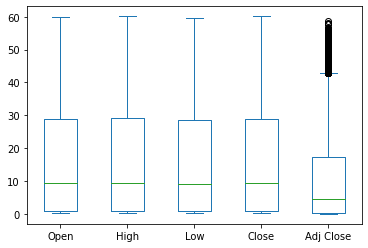

In [23]:
df[['Open','High','Low','Close','Adj Close']].plot(kind = 'box')

In [26]:
# Create the trace for the stock prices
trace = go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Stock Prices of Coca Cola')

# Set the layout for the plot
layout = go.Layout(
    title='Stock Prices of Coca Cola',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='Purple'
        ),
        # Custom date format to show only the year
        tickformat='%Y'
    ),
    yaxis=dict(
        title='Close Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='Purple'
        )
    )
)

# Create the figure and add the trace and layout
figure = go.Figure(data=[trace], layout=layout)

# Display the Plotly chart in Jupyter Notebook
iplot(figure)


# Regression Model

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error as mse, r2_score


In [30]:
#Split data
X = np.array(df.index).reshape(-1,1)
y =df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [32]:
#Feature scaling
scaler=StandardScaler().fit(X_train)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
# Plot predicted values
trace0 = go.Scatter(
    x=X_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual')

# Predicted values using the trained model
y_pred_train = linear_reg.predict(X_train)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=y_pred_train,
    mode='lines',
    name='Predicted')

df_data = [trace0, trace1]
layout = go.Layout(
    title='Actual vs Predicted Values',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Close Price')
)
plot2 = go.Figure(data=df_data, layout=layout)

# Display the Plotly chart in Jupyter Notebook
plot2.show()

In [42]:
from sklearn.metrics import mean_squared_error
#Calculate scores for model evaluation
#Calculate Mean Squared Error (MSE)
y_pred_test = linear_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the scores
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2 score:", train_r2)
print("Testing R2 score:", test_r2)

Training MSE: 46.42677673441925
Testing MSE: 46.914443180604955
Training R2 score: 0.8386369104421472
Testing R2 score: 0.8348946913082109
